In [1]:
import lecilab_behavior_analysis.utils as utils
import lecilab_behavior_analysis.df_transforms as dft
import lecilab_behavior_analysis.plots as plots
from pathlib import Path
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
tv_projects = utils.get_server_projects()
animals = utils.get_animals_in_project(tv_projects[1])
animals_to_remove = ['test', 'test2']
animals = [animal for animal in animals if animal not in animals_to_remove]
# retrieve the data for the remaining animals
for mouse in animals:
    local_path = Path(utils.get_outpath()) / Path(tv_projects[1]) / Path("sessions") / Path(mouse)
    # create the directory if it doesn't exist
    local_path.mkdir(parents=True, exist_ok=True)
    # download the session data
    utils.rsync_session_data(
        project_name=tv_projects[1],
        animal=mouse,
        local_path=str(local_path),
        credentials=utils.get_idibaps_cluster_credentials(),
    )

df_list = []
for mouse in animals:
    local_path = Path(utils.get_outpath()) / Path(tv_projects[1]) / Path("sessions") / Path(mouse)
    df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")
    df_list.append(df)
    print(f"Loaded data for {mouse}.")
# concatenate the dataframes
df = pd.concat(df_list, ignore_index=True)

receiving incremental file list
ACV001.csv

sent 75,108 bytes  received 2,060,333 bytes  170,835.28 bytes/sec
total size is 126,461,756  speedup is 59.22
receiving incremental file list
ACV002.csv

sent 76,039 bytes  received 1,133,340 bytes  142,279.88 bytes/sec
total size is 125,141,258  speedup is 103.48
receiving incremental file list
ACV003.csv

sent 73,757 bytes  received 1,967,433 bytes  240,140.00 bytes/sec
total size is 122,089,083  speedup is 59.81
receiving incremental file list
ACV004.csv

sent 63,981 bytes  received 483,639 bytes  64,425.88 bytes/sec
total size is 86,064,301  speedup is 157.16
receiving incremental file list
ACV005.csv

sent 61,895 bytes  received 647,560 bytes  128,991.82 bytes/sec
total size is 81,557,348  speedup is 114.96
receiving incremental file list
ACV006.csv

sent 68,073 bytes  received 328,418 bytes  34,477.48 bytes/sec
total size is 96,300,061  speedup is 242.88
receiving incremental file list
ACV007.csv

sent 61,608 bytes  received 561,596 byt

/tmp/ipykernel_281538/3884949693.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV001.


/tmp/ipykernel_281538/3884949693.py:21: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV002.


/tmp/ipykernel_281538/3884949693.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV003.


/tmp/ipykernel_281538/3884949693.py:21: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV004.


/tmp/ipykernel_281538/3884949693.py:21: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV005.


/tmp/ipykernel_281538/3884949693.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV006.


/tmp/ipykernel_281538/3884949693.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV007.


/tmp/ipykernel_281538/3884949693.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV008.


/tmp/ipykernel_281538/3884949693.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV009.


/tmp/ipykernel_281538/3884949693.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV010.


In [3]:
time_of_restraint_removal = '2025-06-10 14:00:00'
time_before_removal = pd.to_datetime(time_of_restraint_removal) - pd.Timedelta(days=30)

# transform the date column to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

df_before = df[np.logical_and(df['date'] > time_before_removal, 
                        df['date'] < pd.to_datetime(time_of_restraint_removal))]
df_after = df[df['date'] >= pd.to_datetime(time_of_restraint_removal)]

In [4]:
occupancy_df_before = dft.get_start_and_end_of_sessions_df(df_before)
daily_percentages_before = dft.get_daily_occupancy_percentages(occupancy_df_before)

occupancy_df_after = dft.get_start_and_end_of_sessions_df(df_after)
daily_percentages_after = dft.get_daily_occupancy_percentages(occupancy_df_after)

In [5]:
# merge the two dataframes
occupancy_df_before['time_limit'] = '25/30mins_4hours'
occupancy_df_after['time_limit'] = '1min_1min'
# turn daily percentages into a dataframe with the index as a column
daily_percentages_before = daily_percentages_before.reset_index()
daily_percentages_after = daily_percentages_after.reset_index()
daily_percentages_before['time_limit'] = '25/30mins_4hours'
daily_percentages_after['time_limit'] = '1min_1min'
occupancy_df = pd.concat([occupancy_df_before, occupancy_df_after], ignore_index=True)
daily_percentages = pd.concat([daily_percentages_before, daily_percentages_after], ignore_index=False)

In [6]:
# remove the 2025-06-10 date
occupancy_df = occupancy_df[occupancy_df['date'] != pd.to_datetime('2025-06-10').date()]
daily_percentages = daily_percentages[daily_percentages['date'] != pd.to_datetime('2025-06-10').date()]

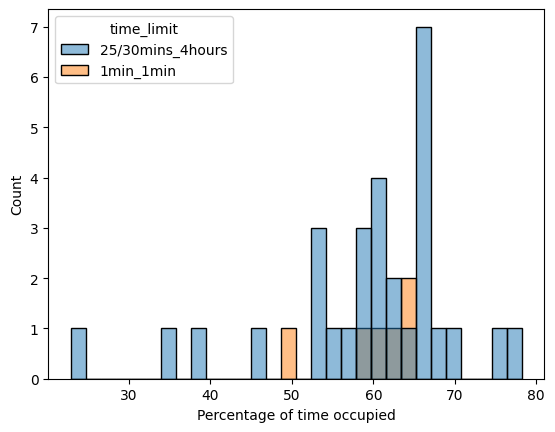

In [7]:
sns.histplot(data=daily_percentages, x='duration', hue='time_limit', stat='count', bins=30)
plt.xlabel("Percentage of time occupied")
plt.show()

In [8]:
# night and day occupancy
occupancy_heatmap_before = dft.get_occupancy_heatmap(occupancy_df[occupancy_df.time_limit == '25/30mins_4hours'], window_size=30)
occupancy_heatmap_after = dft.get_occupancy_heatmap(occupancy_df[occupancy_df.time_limit == '1min_1min'], window_size=30)

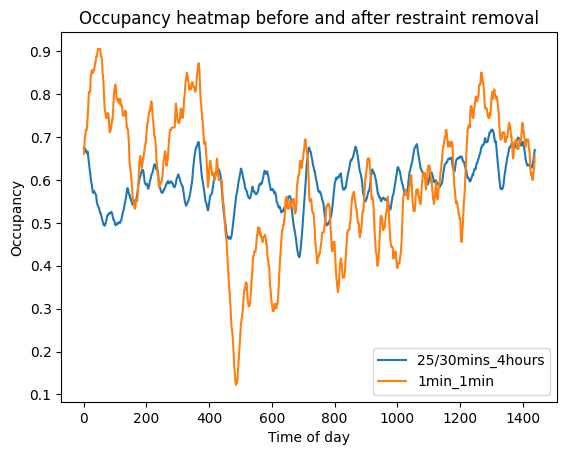

In [9]:
min_of_day = list(np.arange(0, len(occupancy_heatmap_before)))
plt.plot(min_of_day, occupancy_heatmap_before, label='25/30mins_4hours')
plt.plot(min_of_day, occupancy_heatmap_after, label='1min_1min')
plt.xlabel("Time of day")
plt.ylabel("Occupancy")
plt.title("Occupancy heatmap before and after restraint removal")
plt.legend()
plt.show()

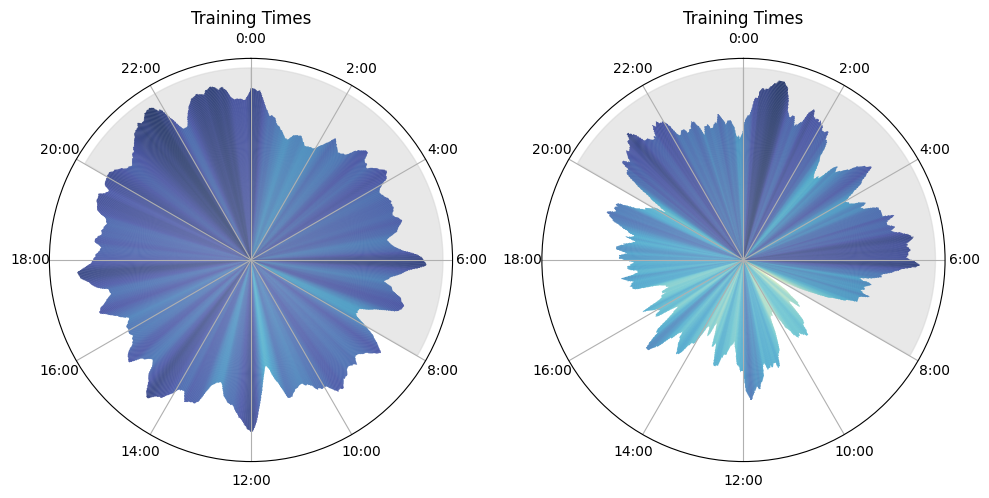

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 10), subplot_kw={"projection": "polar"})
plots.plot_training_times_clock_heatmap(occupancy_heatmap_before, ax=axs[0])
plots.plot_training_times_clock_heatmap(occupancy_heatmap_after, ax=axs[1])
plt.tight_layout()
plt.show()

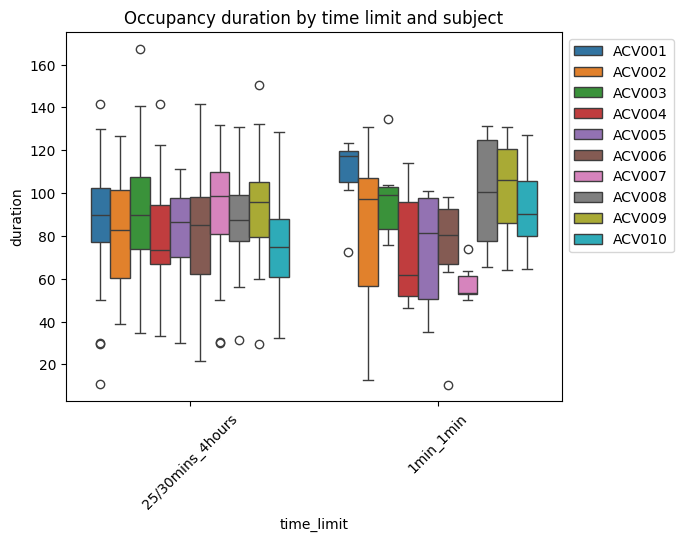

In [11]:
occ_df_gb = occupancy_df.groupby(['subject', 'date', 'time_limit'])['duration'].sum().reset_index()
sns.boxplot(data=occ_df_gb, x='time_limit', y='duration', hue='subject')
plt.xticks(rotation=45)
plt.title('Occupancy duration by time limit and subject')
# move legend to the right outside of the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [12]:
## plot a distribution with the histogram of number of trials in total and by mouse

# get session summary data
local_path = Path(utils.get_outpath()) / Path(tv_projects[1])
# download the session data
utils.rsync_sessions_summary(
    project_name=tv_projects[1],
    local_path=str(local_path),
    credentials=utils.get_idibaps_cluster_credentials(),
)
sessions_summary_df = pd.read_csv(local_path / Path('sessions_summary.csv'), sep=';')

receiving incremental file list
sessions_summary.csv

sent 11,551 bytes  received 23,078 bytes  13,851.60 bytes/sec
total size is 4,011,076  speedup is 115.83


In [13]:
# filter the sessions summary for before and after
sessions_summary_df['date'] = pd.to_datetime(sessions_summary_df['date'], format='%Y-%m-%d %H:%M:%S')
sessions_summary_df = sessions_summary_df[sessions_summary_df['date'] > pd.to_datetime(time_before_removal)]
sessions_summary_df["time_limit"] = np.where(
    sessions_summary_df['date'] < pd.to_datetime(time_of_restraint_removal),
    '25/30mins_4hours',
    '1min_1min'
)


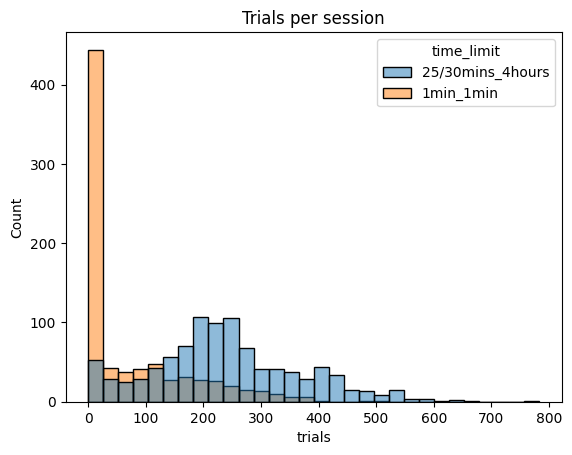

In [14]:
sns.histplot(data=sessions_summary_df, x='trials', hue='time_limit', stat='count', bins=30)
plt.title("Trials per session")
plt.show()

In [15]:
# calculate the number of trials per day, and the number of sessions per day
sessions_summary_df['date_day'] = sessions_summary_df['date'].dt.date
trials_per_day = sessions_summary_df.groupby(['date_day', 'time_limit', 'subject']).agg({'trials': 'sum', 'task': 'count'}).reset_index()
# rename the columns
trials_per_day.rename(columns={'task': 'sessions'}, inplace=True)

In [16]:
# cap the number of sessions to 10 for plotting
trials_per_day['sessions'] = trials_per_day['sessions'].clip(upper=10)

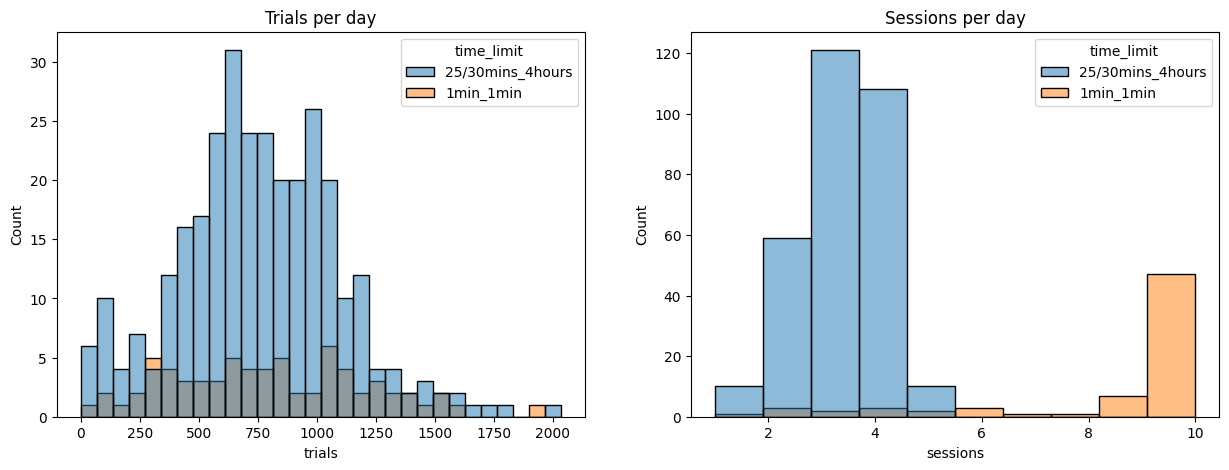

In [17]:
# plot two histograms, one for trials and one for sessions
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=trials_per_day, x='trials', hue='time_limit', stat='count', bins=30, ax=ax[0])
sns.histplot(data=trials_per_day, x='sessions', hue='time_limit', stat='count', bins=10, ax=ax[1])
ax[0].set_title("Trials per day")
ax[1].set_title("Sessions per day")
plt.show()

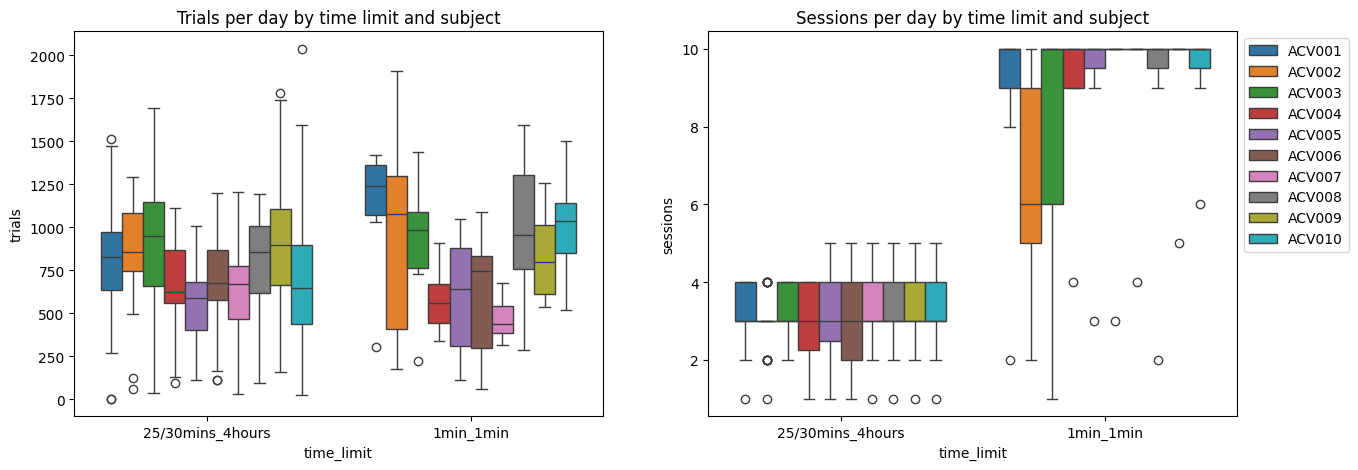

In [18]:
# make boxplots for each mouse as above
hue_order = sorted(trials_per_day['subject'].unique())
trials_per_day['subject'] = pd.Categorical(trials_per_day['subject'], categories=hue_order, ordered=True)
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=trials_per_day, x='time_limit', y='trials', hue='subject', ax=ax[0])
sns.boxplot(data=trials_per_day, x='time_limit', y='sessions', hue='subject', ax=ax[1])
ax[0].set_title('Trials per day by time limit and subject')
ax[1].set_title('Sessions per day by time limit and subject')
ax[0].get_legend().remove()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [19]:
# plot performance by mouse over trials with vertical lines for the time of restraint removal
training_stage_to_look_at = "TwoAFC_auditory_easy"
df_tla = df[df['current_training_stage'] == training_stage_to_look_at]
df_tla = dft.analyze_df(df_tla)

/home/hmv/Github/lecilab-behavior-analysis/lecilab_behavior_analysis/df_transforms.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna("not saved")
/home/hmv/Github/lecilab-behavior-analysis/lecilab_behavior_analysis/df_transforms.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["correct"] = df["correct"].infer_objects(copy=False)


In [20]:
df_tla["time_limit"] = np.where(
    df_tla['date'] < pd.to_datetime(time_of_restraint_removal),
    '25/30mins_4hours',
    '1min_1min'
)

In [21]:
df_to_plot_correct = df_tla.groupby(['subject', 'year_month_day', 'time_limit'])[['correct']].mean().reset_index()

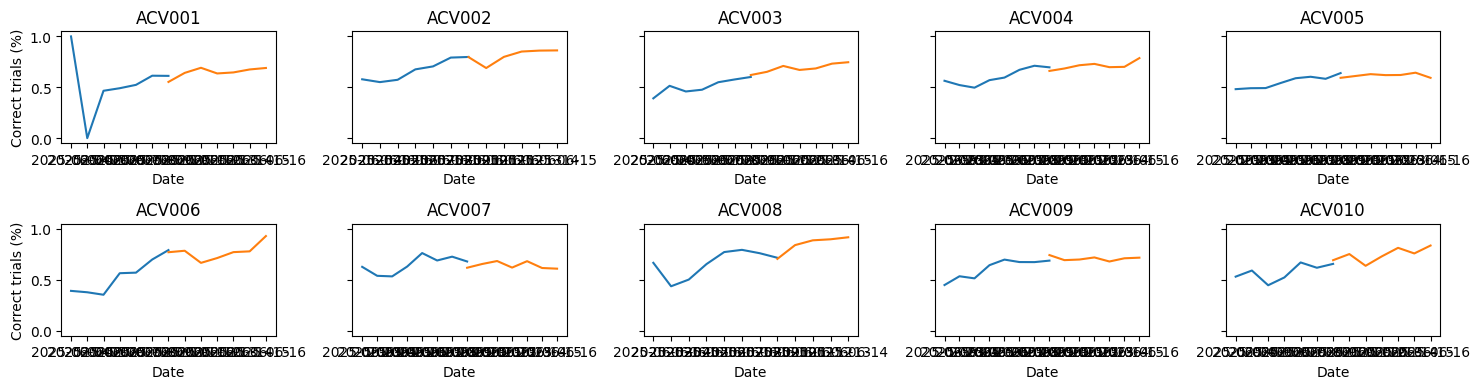

In [22]:
ncols = df_to_plot_correct.subject.nunique() / 2
nrows = 2
fig, axes = plt.subplots(nrows, int(np.ceil(ncols)), figsize=(15, 2 * nrows), sharey=True)
for i, (subject, group) in enumerate(df_to_plot_correct.groupby('subject')):
    ax = axes[i // int(np.ceil(ncols)), i % int(np.ceil(ncols))]
    sns.lineplot(data=group, x='year_month_day', y='correct', hue='time_limit', ax=ax)
    ax.set_title(f"{subject}")
    # ax.axvline(pd.to_datetime(time_of_restraint_removal), color='red', linestyle='--', label='Time of restraint removal')
    # ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Correct trials (%)")
    ax.legend().remove()
plt.tight_layout()
plt.show()

In [23]:
# redo it by computing the performance in each trial.
df_subject_list = []
for mouse in animals:
    df_mouse = df_tla[df_tla['subject'] == mouse]
    # calculate the performances
    df_mouse = dft.get_performance_through_trials(df_mouse, window=100)
    df_subject_list.append(df_mouse)

df2afc = pd.concat(df_subject_list, ignore_index=True)

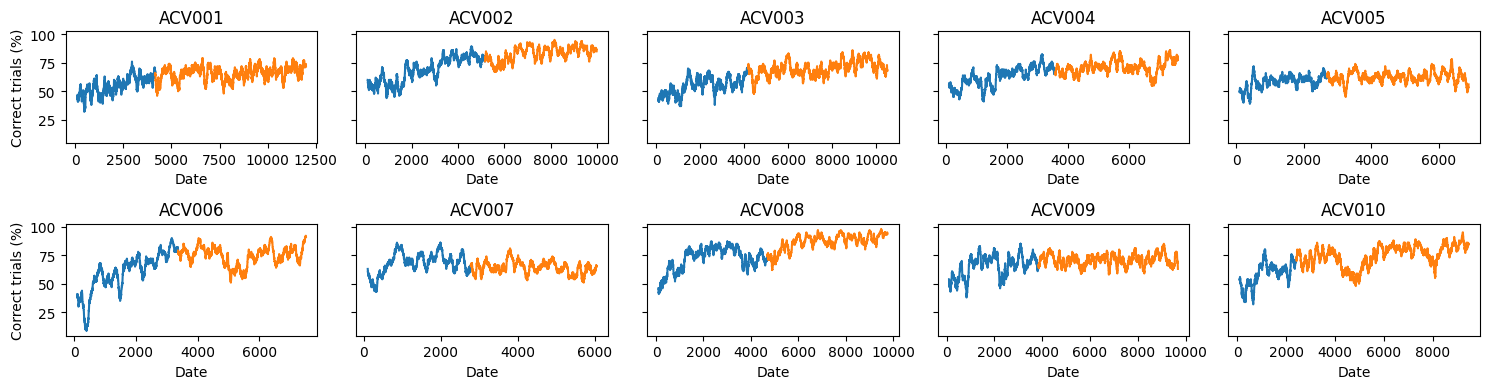

In [24]:
fig, axes = plt.subplots(nrows, int(np.ceil(ncols)), figsize=(15, 2 * nrows), sharey=True)
for i, (subject, group) in enumerate(df2afc.groupby('subject')):
    ax = axes[i // int(np.ceil(ncols)), i % int(np.ceil(ncols))]
    sns.lineplot(data=group, x='total_trial', y='performance_w', hue='time_limit', ax=ax)
    ax.set_title(f"{subject}")
    # ax.axvline(pd.to_datetime(time_of_restraint_removal), color='red', linestyle='--', label='Time of restraint removal')
    # ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Correct trials (%)")
    ax.legend().remove()
plt.tight_layout()
plt.show()

In [ ]:
# tipical behavior of mice entering the box. Engagement

In [28]:
## Differences between night and day sessions